# Recurrent Neural Network

# Part 1 - Data Preprocessing

In [1]:
#importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
print(dataset_train.head())

       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800


In [3]:
print(dataset_train.shape)
print(training_set.shape)

(1258, 6)
(1258, 1)


In [4]:
print(training_set[:5])

[[325.25]
 [331.27]
 [329.83]
 [328.34]
 [322.04]]


In [5]:
#feature Scaling 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [6]:
#creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    
X_train, y_train, = np.array(X_train), np.array(y_train)


In [7]:
print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [8]:
print(X_train[0:1])

[[0.08581368 0.09701243 0.09433366 0.09156187 0.07984225 0.0643277
  0.0585423  0.06568569 0.06109085 0.06639259 0.0614257  0.07474514
  0.02797827 0.02379269 0.02409033 0.0159238  0.01078949 0.00967334
  0.01642607 0.02100231 0.02280676 0.02273235 0.02810849 0.03212665
  0.0433812  0.04475779 0.04790163 0.0440695  0.04648783 0.04745517
  0.04873875 0.03936305 0.04137213 0.04034898 0.04784582 0.04325099
  0.04356723 0.04286033 0.04602277 0.05398467 0.05738894 0.05714711
  0.05569611 0.04421832 0.04514845 0.04605997 0.04412531 0.03675869
  0.04486941 0.05065481 0.05214302 0.05612397 0.05818885 0.06540665
  0.06882953 0.07243843 0.07993526 0.07846566 0.08034452 0.08497656]]


In [9]:
print(y_train[0])

0.08627874097775134


In [10]:
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train[0:1])

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]
  [0.0585423 ]
  [0.06568569]
  [0.06109085]
  [0.06639259]
  [0.0614257 ]
  [0.07474514]
  [0.02797827]
  [0.02379269]
  [0.02409033]
  [0.0159238 ]
  [0.01078949]
  [0.00967334]
  [0.01642607]
  [0.02100231]
  [0.02280676]
  [0.02273235]
  [0.02810849]
  [0.03212665]
  [0.0433812 ]
  [0.04475779]
  [0.04790163]
  [0.0440695 ]
  [0.04648783]
  [0.04745517]
  [0.04873875]
  [0.03936305]
  [0.04137213]
  [0.04034898]
  [0.04784582]
  [0.04325099]
  [0.04356723]
  [0.04286033]
  [0.04602277]
  [0.05398467]
  [0.05738894]
  [0.05714711]
  [0.05569611]
  [0.04421832]
  [0.04514845]
  [0.04605997]
  [0.04412531]
  [0.03675869]
  [0.04486941]
  [0.05065481]
  [0.05214302]
  [0.05612397]
  [0.05818885]
  [0.06540665]
  [0.06882953]
  [0.07243843]
  [0.07993526]
  [0.07846566]
  [0.08034452]
  [0.08497656]]]


# Part 2 Building the RNN

In [11]:
#importing the Keras Libraries and package
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [12]:
#Initialising the RNN
regressor = Sequential()

In [17]:
#Adding the first LSTM layer and some Dropout regularisation 
regressor.add(LSTM(units =50, return_sequences = True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#Adding the first LSTM layer and some Dropout regularisation 
regressor.add(LSTM(units =50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding the first LSTM layer and some Dropout regularisation 
regressor.add(LSTM(units =50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding the first LSTM layer and some Dropout regularisation 
regressor.add(LSTM(units =50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units=1))

#Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.1104
Epoch 2/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0200
Epoch 3/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0189
Epoch 4/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0130
Epoch 5/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0101
Epoch 6/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0112
Epoch 7/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0092
Epoch 8/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0093
Epoch 9/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0087
Epoch 10/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0102
Epoch 11/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0083
Epoc

1198/1198 [==============================] - 12s 10ms/step - loss: 0.0026
Epoch 93/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0021
Epoch 94/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0024
Epoch 95/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0022
Epoch 96/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0022
Epoch 97/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0020
Epoch 98/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0021
Epoch 99/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0023
Epoch 100/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0021


# Part 3 - Making the predictions and visualising the results 

In [18]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [20]:
#Getting the real stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [21]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i-0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predict_stock_price = regressor.predict(X_test)
predict_stock_price = sc.inverse_transform(predict_stock_price)

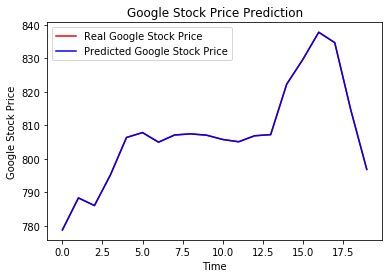

In [22]:
#Visualising the result
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(real_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()